In [67]:
from collections import Counter
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()


In [2]:
def vote_choice(x: str)-> int:
    x_list = x.split(sep="/")
    x_list = list(map(int, x_list))

    return max(x_list,key=x_list.count)

In [3]:
def find_majority(votes):
    x_list = votes.split(sep="/")
    x_list = list(map(int, x_list))
    vote_count = Counter(x_list)
    top_two = vote_count.most_common(2)
    if len(top_two)>1 and top_two[0][1] == top_two[1][1]:
        # It is a tie
        return -1
    return top_two[0][0]

In [4]:
train = pd.read_table("a3_train_final.tsv", names=["target", "input"])

In [26]:
test = pd.read_table('a3_test.tsv', names=["target", "input"])

In [5]:
train['target'] = train['target'].apply(find_majority)

In [6]:
train.groupby(['target']).count()

,input
target,
-1,5433
0,16112
1,16340


In [7]:
train.drop(train.loc[train['target']==-1].index, inplace=True)

In [8]:
train.groupby(['target']).count()

,input
target,
0,16112
1,16340


In [28]:
test.groupby(['target']).count()

,input
target,
0,762
1,762


In [30]:
X_train = train["input"]
Y_train = train["target"]
X_test = test['input']
Y_test = test['target']

In [56]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [48]:
X_test_vectorized

<1524x3717 sparse matrix of type '<class 'numpy.float64'>'
	with 29522 stored elements in Compressed Sparse Row format>

In [11]:
nbc = MultinomialNB()
gnb = GaussianNB()

In [16]:
nbc.fit(X_train_vectorized, Y_train)
gnb.fit(X_train_vectorized.toarray(), Y_train)
# svc.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# model_params = {
#     'svm': {
#         'model': SVC(gamma='auto'),
#         'params' : {
#             'C': [1,10,15,20],
#             'kernel': ['rbf','linear']
#         }  
#     },
#     'naive_bayes_multinomial': {
#         'model': MultinomialNB(),
#         'params': {}
#     },    
# }

In [ ]:
# scores = []

# for model_name, mp in model_params.items():
#     clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf.fit(X_train, Y_train)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_
#     })

In [ ]:
# df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df

In [ ]:
# rs = RandomizedSearchCV(SVC(gamma='auto'),{
#                             'C': [1,10,15,20,25],
#                             'kernel': ['rbf','linear']
#     },
#     cv=5,
#     return_train_score=False,
#     n_iter=5)

In [ ]:
# rs.fit(X_train, Y_train)
# pd.DataFrame(rs.cv_results_)[['param_C', 'param_kernel', 'mean_test_score']]

In [ ]:
param_grid_mnb= {  
            'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
} 

gscv_mnb = GridSearchCV(MultinomialNB(), 
                        param_grid_mnb)

In [ ]:
gscv_mnb.fit(X_train_vectorized, Y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)})

In [ ]:
print(f'Best score: {gscv_mnb.best_score_}')
print(f'Best parameters: {gscv_mnb.best_params_}')

Best score: 0.8068839277045685
Best parameters: {'alpha': 1}


In [22]:
param_grid_gnb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

gscv_gnb = RandomizedSearchCV(GaussianNB(),
                              param_grid_gnb,
                              n_iter=10,
                              cv=5,
                              )

In [77]:
np.logspace(0,-9, num=100)[99]

1e-09

In [23]:
gscv_gnb.fit(X_train_vectorized.toarray(), Y_train)

RandomizedSearchCV(cv=5, estimator=GaussianNB(),
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [24]:
print(f'Best score: {gscv_gnb.best_score_}')
print(f'Best parameters: {gscv_gnb.best_params_}')

Best score: 0.7893505740673528
Best parameters: {'var_smoothing': 0.04328761281083057}


In [38]:
best_var_smoothing_value = gscv_gnb.best_params_['var_smoothing']

In [39]:
nbc = MultinomialNB()
gnb = GaussianNB(var_smoothing=best_var_smoothing_value)

In [40]:
nbc.fit(X_train_vectorized, Y_train)
gnb.fit(X_train_vectorized.toarray(), Y_train)

GaussianNB(var_smoothing=0.04328761281083057)

In [59]:
y_preds_nbc = nbc.predict(X_test_vectorized.toarray())
y_preds_nbc

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [60]:
y_preds_gbc = gnb.predict(X_test_vectorized.toarray())
y_preds_gbc

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

# Confusion Matrix

In [64]:
nbc_cm = confusion_matrix(Y_test, y_preds_nbc)
nbc_cm

array([[640, 122],
       [103, 659]], dtype=int64)

<AxesSubplot: >

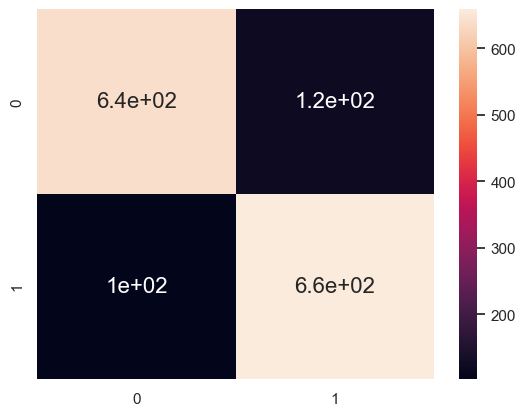

In [69]:
sns.heatmap(nbc_cm, annot=True, annot_kws={"size": 16})

In [65]:
gbc_cm = confusion_matrix(Y_test, y_preds_gbc)
gbc_cm

array([[605, 157],
       [100, 662]], dtype=int64)